You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

In [1]:
# As the output is binary and classified, we will use Decision tree classifier.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [2]:
hospital = pd.read_csv('diabetes.csv')

In [3]:
hospital.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
hospital.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
hospital.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

CONCLUSION: There are no missing values in the dataset.

In [7]:
hospital.duplicated().sum()

0

CONCLUSION: There are no duplicate values in the dataset.

In [8]:
hospital.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

<BarContainer object of 768 artists>

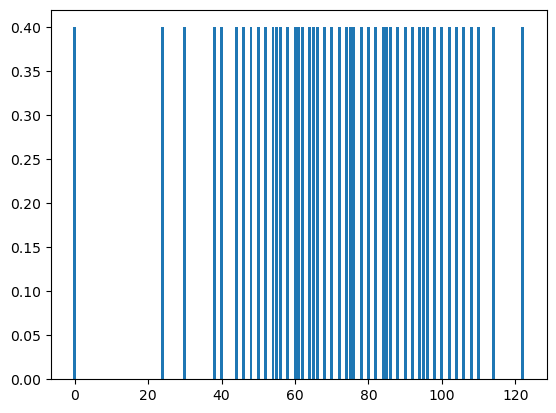

In [9]:
plt.bar(x=hospital['BloodPressure'],height=0.4)

<AxesSubplot: xlabel='BMI', ylabel='Age'>

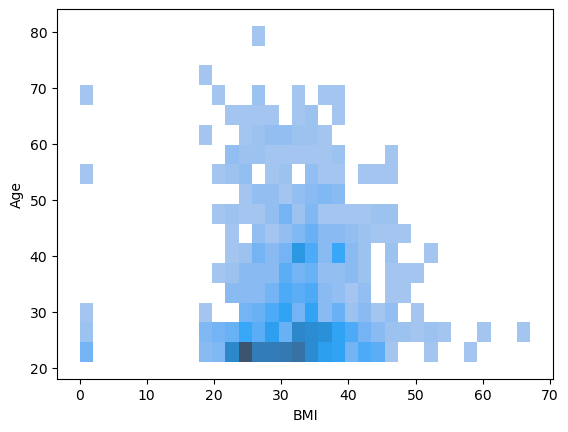

In [10]:
sb.histplot(data=hospital,x=hospital['BMI'],y=hospital['Age'])

In [11]:
X = hospital.iloc[:,:-1]
Y = hospital['Outcome']

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [13]:
DTC = DecisionTreeClassifier()

In [14]:
DTC.fit(X_train,Y_train)

DecisionTreeClassifier()

In [15]:
Y_pred = DTC.predict(X_test)

In [16]:
# Performance metrics

In [17]:
classification_report(Y_test,Y_pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.74      0.77       151\n           1       0.57      0.68      0.62        80\n\n    accuracy                           0.71       231\n   macro avg       0.69      0.71      0.70       231\nweighted avg       0.73      0.71      0.72       231\n'

In [18]:
confusion_matrix(Y_test,Y_pred)

array([[111,  40],
       [ 26,  54]])

In [19]:
accuracy_score(Y_test,Y_pred)

0.7142857142857143

From our model, we got 68.8% accuracy. We will now apply hyper-parameter tuning to increase model accuracy.

In [20]:
Parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best','random'],
    'max_depth':[2,3,5,8],
    'min_samples_split':[1,2,3],
}

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
GRID = GridSearchCV(estimator=DTC,param_grid=Parameters,cv=3,verbose=1,refit=True)

In [23]:
GRID.fit(X_train,Y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 5, 8],
                         'min_samples_split': [1, 2, 3],
                         'splitter': ['best', 'random']},
             verbose=1)

In [24]:
GRID.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_split': 1,
 'splitter': 'random'}

In [25]:
# Lets create one more model using the best paramters

In [26]:
DTC_new = DecisionTreeClassifier(criterion='gini',max_depth=2,min_samples_split=1,splitter='best')

In [27]:
DTC_new.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=2, min_samples_split=1)

In [28]:
Y_PRED = DTC_new.predict(X_test)

In [29]:
accuracy_score(Y_test,Y_PRED)

0.7186147186147186

If we compare the accuarcy of both the models, we find that the model (DTC_new) gives better result as compared to (DTC)

In [30]:
confusion_matrix(Y_test,Y_PRED)

array([[139,  12],
       [ 53,  27]])

In [31]:
# Here:

TP = 27
TN = 139
FP = 12
FN = 53

In [32]:
Precision = TP/(TP + FP)

In [33]:
Recall = TP/(TP + FN)

In [34]:
F1_score = (2*Precision*Recall)/(Precision + Recall)

In [35]:
print(Precision)
print(Recall)
print(F1_score)

0.6923076923076923
0.3375
0.45378151260504196


In [36]:
from sklearn.metrics import roc_curve,auc

In [37]:
FPR, TPR, _ = roc_curve(Y_test,Y_pred)

In [38]:
roc_auc = auc(FPR,TPR)

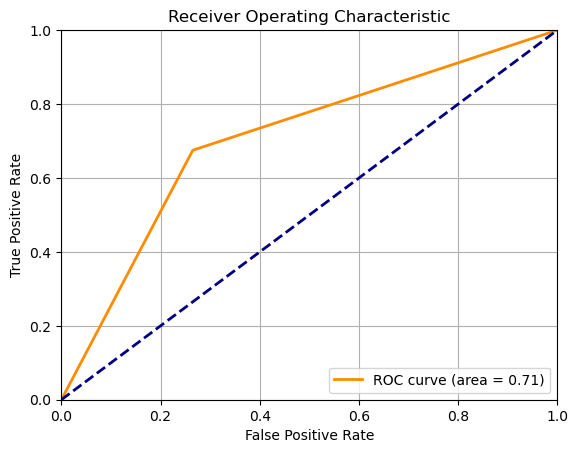

In [39]:
plt.figure()
plt.plot(FPR, TPR, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [40]:
from sklearn.tree import plot_tree

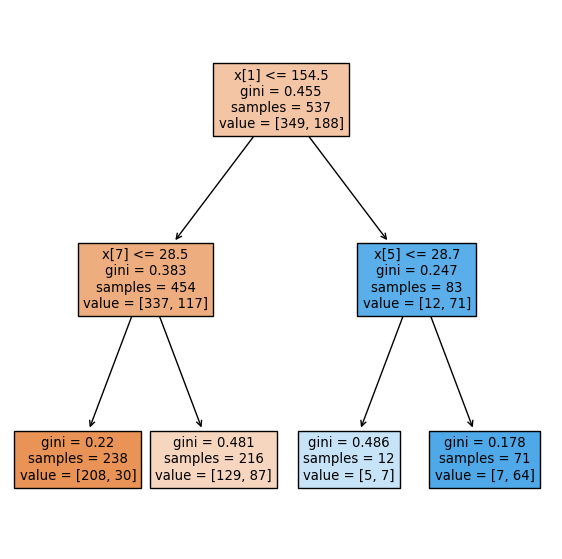

In [41]:
plt.figure(figsize=(7,7))
plot_tree(DTC_new,filled=True)
plt.show()

Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

In [42]:
testing = pd.read_excel('testdata.xlsx')

In [43]:
testing

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3,23,78,34,12,0.5,0.53,34,1
1,8,45,57,53,64,4.2,0.21,54,0
2,12,22,123,65,54,12.3,0.74,23,1
3,6,47,143,12,24,6.4,0.42,52,1
4,6,12,98,53,63,9.3,0.62,65,1
5,3,53,77,66,11,5.5,0.71,48,0


In [44]:
X1 = testing.iloc[:,:-1]
Y1 = testing['Outcome']

In [47]:
x_tr,x_te,y_tr,y_te = train_test_split(X1,Y1,test_size=0.2,random_state=30)

In [48]:
DTC_new.fit(x_tr,y_tr)

DecisionTreeClassifier(max_depth=2, min_samples_split=1)

In [49]:
predicted =  DTC_new.predict(x_te)

In [50]:
accuracy_score(y_te,predicted)

0.5